In [1]:
import sys
sys.path.append(r'H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')
from meltsdynamic import MELTSdynamic
from meltsengine import MELTSengine
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from meltsplotter import MELTSplotter
import sys, os
import shutil
import tempfile
from collections import OrderedDict
from pathlib import Path
import deepdish as dd
import itertools
%matplotlib inline
import time
import random
import pyMELTScalc as M
import re
from matplotlib.cm import get_cmap
from cmcrameri import cm
import Thermobar as pt
import distinctipy
import PySulfSat as ss

In [2]:
file = pd.read_csv('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/MELTs/pyMELTScalc-master/Examples/CrystallisationTests/SchmidtVan_scss.csv')
#file = pd.read_csv('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Metrich_Tan2318.csv')
#file = pd.read_csv('/Users/ollie/Rhiannon_MELTS/StVincbulks.csv')
#file = pd.read_csv('/Users/ollie/Rhiannon_MELTS/gleeson_azorestest.csv')
header = file.columns.values.tolist()
file

,P,Temp,FMQ,CO2,SiO2,TiO2,Al2O3,FeO,Fe2O3,MgO,...,Na2O,K2O,MnO,P2O5,H2O,Cr2O5,NiO,Ni,Cu,FeOt
0,2000,1350,0,0.1,49.2,0.69,12.9,7.2689,2.6907,12.93,...,1.99,0.97,0.2,0.2,1,0,0,20,30,9.9596


In [5]:
bulk = file.iloc[0].values.tolist()

h2o = [0.1,1.0, 4.0, 6.0]
emptydf = pd.DataFrame()

for i in range(len(h2o)):
    bulk[15] = h2o[i]

    emptydf = emptydf.append(pd.DataFrame([bulk]), ignore_index=True)

emptydf.columns = header
emptydf = emptydf[['SiO2', 'TiO2', 'Al2O3','FeOt', 'MgO', 'CaO', 'Na2O', 'K2O','MnO', 'P2O5', 'H2O']]#'CO2',,]], 
emptydf['Fe3Fet']=  [0.15,0.18,0.21,0.25]
#emptydf['CO2'] = [0.05]

In [6]:
emptydf.columns = [str(col) + '_Liq' for col in emptydf.columns]
emptydf

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,MnO_Liq,P2O5_Liq,H2O_Liq
0,49.2,0.69,12.9,9.9596,12.93,11.21,1.99,0.97,0.2,0.2,0.1
1,49.2,0.69,12.9,9.9596,12.93,11.21,1.99,0.97,0.2,0.2,1.0
2,49.2,0.69,12.9,9.9596,12.93,11.21,1.99,0.97,0.2,0.2,4.0
3,49.2,0.69,12.9,9.9596,12.93,11.21,1.99,0.97,0.2,0.2,6.0


In [7]:
QFM1_input = emptydf.copy()
#QFM1_input['Fe3Fet_Liq'] = ""
QFM1_input['buffer'] = 'QFM_1'
QFM1_input

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,MnO_Liq,P2O5_Liq,H2O_Liq,buffer
0,49.2,0.69,12.9,9.9596,12.93,11.21,1.99,0.97,0.2,0.2,0.1,QFM_1
1,49.2,0.69,12.9,9.9596,12.93,11.21,1.99,0.97,0.2,0.2,1.0,QFM_1
2,49.2,0.69,12.9,9.9596,12.93,11.21,1.99,0.97,0.2,0.2,4.0,QFM_1
3,49.2,0.69,12.9,9.9596,12.93,11.21,1.99,0.97,0.2,0.2,6.0,QFM_1


In [8]:
QFM1_input['dictindex'] = 'H2O_' + QFM1_input['H2O_Liq'].astype(str)  + '_' 'buff_' + QFM1_input['buffer'] #+ '_' 'CO2_' + merged['CO2_Liq'].astype(str)

In [9]:
Comp = QFM1_input.copy()

In [10]:
P_lin = ([2000.0,1000.0,500.0])
P_results_QFM1 = {}
for i in range(len(P_lin)):
    P_bar = P_lin[i]
    print(P_bar)
    Results = M.multi_path(cores=4,Model = "MELTSv1.2.0", comp = Comp_qfm1, Frac_solid = True, Frac_fluid = True, T_end_C = 700, dt_C = 5,
                      P_bar = P_bar, fO2_buffer = "FMQ", fO2_offset = 1, H2O_Liq = None, find_liquidus = True)

    P_results_QFM1['P = ' + str(P_lin[i]) + ' bars'] = Results

2000.0


Running MELTSv1.2.0 calculations 0 to 3.0 ... Complete (time taken = 198.63 seconds)

1000.0


Running MELTSv1.2.0 calculations 0 to 3.0 ... Complete (time taken = 8.75 seconds)

500.0


Running MELTSv1.2.0 calculations 0 to 3.0 ... Complete (time taken = 186.78 seconds)



In [25]:
P_results_QFM1['P = 500.0 bars'].keys()

dict_keys(['index = 1', 'index = 0', 'index = 2'])

In [18]:
empty = pd.DataFrame() 

for key in P_results_QFM1:
    # p_dict is a dictionary of a single pressure 
    p_dict = P_results_QFM1[key]
    final_dict = p_dict
    for key in final_dict:
        new = final_dict[key]['All']
        new['dictindex'] = key
        new[['pressure_bar', 'T_C']] = final_dict[key]['Conditions'][['P_bar','T_C']]
        empty = empty.append(new)
empty.dictindex.unique()

array(['index = 2', 'index = 3', 'index = 1', 'index = 0'], dtype=object)

In [23]:
QFM1_input['index'] = QFM1_input.index #caveats w this format, change 
newkeys = QFM1_input[['index','dictindex']]
newkeys

,index,dictindex
0,0,H2O_0.1_buff_QFM_1
1,1,H2O_1.0_buff_QFM_1
2,2,H2O_4.0_buff_QFM_1
3,3,H2O_6.0_buff_QFM_1


In [26]:
empty_index = empty.reset_index()

In [27]:
empty_index['newentry'] = empty_index['dictindex'].str.extract('(\d+)')
empty_index['newentry']

0       2
1       2
2       2
3       2
4       2
       ..
1031    2
1032    2
1033    2
1034    2
1035    2
Name: newentry, Length: 1036, dtype: object

In [28]:
empty_index['newcolumn'] = 0
for i in range(len(empty_index)):
    empty_index['newentry'][i] = float(empty_index['newentry'][i])
    empty_index['newcolumn'][i] = newkeys['dictindex'][empty_index['newentry'][i]]
empty_index.shape

<ipython-input-28-69e151919c31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_index['newentry'][i] = float(empty_index['newentry'][i])
<ipython-input-28-69e151919c31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_index['newcolumn'][i] = newkeys['dictindex'][empty_index['newentry'][i]]
/Users/ollie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self

(1036, 310)

In [29]:
empty_index['unique'] = 'P_'+ empty_index['P_bar'].astype(str) + '_' + empty_index['newcolumn'].astype(str)

empty_index.newcolumn.unique(), empty_index.unique.unique() #if run at 2 pressures there should be double the categories of newcolumn
empty = empty_index.copy()

## Part 5: Export master dataframe. Read in for following steps to reduce computer power. Unless we want to amend the data up to this point 

In [30]:
#v1.2.0 no co2 for now 01. - 8 wt% H2O and Fe3Fet correlating to H2O
empty.to_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Schmidt_FC_pyMELTcalc_1.2.0_natural_March_QFM1.xlsx')


In [31]:
# check what youre reading in
empty_na = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/Paper_2/FC_simulations/Schmidt_FC_pyMELTcalc_1.2.0_natural_March_QFM1.xlsx', index_col=0)


In [32]:
empty_na.shape

(1036, 311)

In [33]:
empty_index = pd.concat([empty_na], axis=0,ignore_index=True)#,empty_na_shall


In [37]:
# Routine check that we fractionated phases/ which phases we fractionated
empty_index.head()

,index,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,Cr2O3_Liq,...,H2O_tridymite1,CO2_tridymite1,Fe3Fet_tridymite1,h_tridymite1,mass_tridymite1,v_tridymite1,rho_tridymite1,newentry,newcolumn,unique
0,0,1231.500000,2000,-1.207599e+06,302.241739,40.584139,47.086932,0.660366,12.345964,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1
1,1,1226.485849,2000,-1.208644e+06,301.539250,40.547667,47.123416,0.664113,12.416022,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1
2,2,1221.471698,2000,-1.202472e+06,299.452850,40.335685,47.159831,0.667836,12.485623,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1
3,3,1216.457547,2000,-1.196403e+06,297.395146,40.126862,47.196162,0.671533,12.554743,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1
4,4,1211.443396,2000,-1.190456e+06,295.369479,39.921637,47.232408,0.675204,12.623380,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1


## Modelling SCSS, SCAS and Stotal

In [35]:
# Li and Zhang
LiZhang22=ss.calculate_LZ2022_SCSS(df=empty_index, T_K=empty_index['T_C']+273.15, 
P_kbar=empty_index['pressure_bar']/1000,Fe_FeNiCu_Sulf=0.65,Fe3Fet_Liq=empty_index['Fe3Fet_Liq'], H2O_Liq=empty_index['H2O_Liq'])
LiZhang22.head()

replacing Fe3Fet_Liq in the original dataframe with that input into the function


,SCSS_Tot,index,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,...,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,1551.101167,0,1231.500000,2000,-1.207599e+06,302.241739,40.584139,47.086932,0.660366,12.345964,...,0.138235,0.059580,0.001540,0.175258,0.109207,0.035081,0.011251,0.001539,0.0,0.016252
1,1535.409124,1,1226.485849,2000,-1.208644e+06,301.539250,40.547667,47.123416,0.664113,12.416022,...,0.139145,0.059551,0.001543,0.172515,0.109908,0.035312,0.011325,0.001550,0.0,0.016314
2,1519.779010,2,1221.471698,2000,-1.202472e+06,299.452850,40.335685,47.159831,0.667836,12.485623,...,0.140049,0.059516,0.001546,0.169794,0.110604,0.035541,0.011399,0.001560,0.0,0.016375
3,1504.214034,3,1216.457547,2000,-1.196403e+06,297.395146,40.126862,47.196162,0.671533,12.554743,...,0.140949,0.059473,0.001549,0.167096,0.111297,0.035770,0.011472,0.001570,0.0,0.016436
4,1488.715097,4,1211.443396,2000,-1.190456e+06,295.369479,39.921637,47.232408,0.675204,12.623380,...,0.141843,0.059424,0.001551,0.164423,0.111985,0.035997,0.011545,0.001580,0.0,0.016496


In [36]:
# ONeill 
ONeill_MeasSulf=ss.calculate_O2021_SCSS(df=empty_index, T_K=empty_index['T_C']+273.15, 
P_kbar=empty_index['pressure_bar']/1000,Fe_FeNiCu_Sulf=0.65,Fe3Fet_Liq=empty_index['Fe3Fet_Liq'])
ONeill_MeasSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,index,T_C,P_bar,h,...,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,Fe2_Liq_cat_frac
0,1421.105829,7.259191,-2.406645,-0.492310,7.458249,-2.113394,0,1231.500000,2000,-1.207599e+06,...,0.075949,0.109375,0.138448,0.035135,0.011269,0.004726,0.0,0.697981,0.746286,0.059672
1,1402.902437,7.246299,-2.403597,-0.492279,7.491715,-2.156734,1,1226.485849,2000,-1.208644e+06,...,0.075983,0.110078,0.139360,0.035367,0.011343,0.004757,0.0,0.694552,0.743380,0.059644
2,1384.800526,7.233311,-2.400637,-0.492242,7.525416,-2.200500,2,1221.471698,2000,-1.202472e+06,...,0.076010,0.110777,0.140268,0.035597,0.011417,0.004788,0.0,0.691097,0.740451,0.059609
3,1366.803714,7.220230,-2.397765,-0.492197,7.559357,-2.244694,3,1216.457547,2000,-1.196403e+06,...,0.076029,0.111472,0.141170,0.035826,0.011490,0.004819,0.0,0.687616,0.737499,0.059567
4,1348.912937,7.207054,-2.394981,-0.492146,7.593538,-2.289318,4,1211.443396,2000,-1.190456e+06,...,0.076040,0.112163,0.142067,0.036054,0.011563,0.004850,0.0,0.684110,0.734526,0.059518


In [39]:
Smythe_CalcSulf=ss.calculate_S2017_SCSS(df=empty_index, T_K=empty_index['T_C']+273.15,
                                             P_kbar=empty_index['pressure_bar']/1000, Fe_FeNiCu_Sulf=0.65,
                                             Fe3Fet_Liq=empty_index['Fe3Fet_Liq'])
Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,...,H2O_tridymite1,CO2_tridymite1,Fe3Fet_tridymite1,h_tridymite1,mass_tridymite1,v_tridymite1,rho_tridymite1,newentry,newcolumn,unique
0,1123.075176,306.790193,1504.650000,2.0,0.65,0.214315,0.360006,0.003797,0.111247,0.141044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1
1,1107.228401,302.461333,1499.635849,2.0,0.65,0.215040,0.360147,0.003817,0.111836,0.138658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1
2,1091.558586,298.180814,1494.621698,2.0,0.65,0.215776,0.360287,0.003837,0.112420,0.136297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1
3,1076.064391,293.948268,1489.607547,2.0,0.65,0.216523,0.360426,0.003857,0.112998,0.133962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1
4,1060.743480,289.763058,1484.593396,2.0,0.65,0.217281,0.360564,0.003876,0.113572,0.131653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1


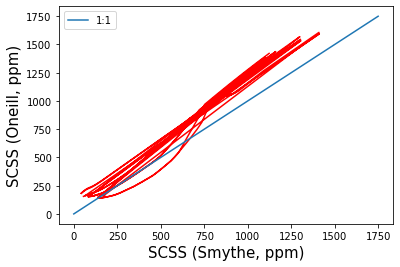

In [40]:
plt.plot(Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'], ONeill_MeasSulf['SCSS2_ppm'], '-r')
plt.xlabel('SCSS (Smythe, ppm)', size=15)
plt.ylabel('SCSS (Oneill, ppm)', size=15)
plt.plot([0,1750], [0,1750], label='1:1')
plt.legend()

In [41]:
# Calculating SCAS 
ZT22_SCAS=ss.calculate_ZT2022_SCAS(df=empty_index, T_K=empty_index['T_C']+273.15)
ZT22_SCAS.head()

,Calc SCAS (ppm),index,T_C,P_bar,h,s,v,SiO2_Liq,TiO2_Liq,Al2O3_Liq,...,H2O_tridymite1,CO2_tridymite1,Fe3Fet_tridymite1,h_tridymite1,mass_tridymite1,v_tridymite1,rho_tridymite1,newentry,newcolumn,unique
0,11039.554388,0,1231.500000,2000,-1.207599e+06,302.241739,40.584139,47.086932,0.660366,12.345964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1
1,10731.497130,1,1226.485849,2000,-1.208644e+06,301.539250,40.547667,47.123416,0.664113,12.416022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1
2,10434.698434,2,1221.471698,2000,-1.202472e+06,299.452850,40.335685,47.159831,0.667836,12.485623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1
3,10148.643460,3,1216.457547,2000,-1.196403e+06,297.395146,40.126862,47.196162,0.671533,12.554743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1
4,9872.818450,4,1211.443396,2000,-1.190456e+06,295.369479,39.921637,47.232408,0.675204,12.623380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,H2O_4.0_buff_QFM_1,P_2000.0_H2O_4.0_buff_QFM_1


In [42]:
# Corrections: 
    # S6+ / St
    
calcS_OM2022_GivenFe3=ss.calculate_OM2022_S6St(df=empty_index, 
                                               T_K=empty_index['T_C']+273.15,
                                               Fe3Fet_Liq=empty_index['Fe3Fet_Liq'])
calcS_OM2022_GivenFe3

,S6St_Liq,LnCS2_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,index,T_C,P_bar,h,s,...,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac,LnCS6_calc
0,0.939266,-2.116522,-16.829093,2.738595,1.687667,0,1231.500000,2000,-1.207599e+06,302.241739,...,0.138235,0.035081,0.011251,0.004719,0.001539,0.697981,0.746286,-6.382383,0.059580,13.184941
1,0.937155,-2.159897,-16.951225,2.702180,1.685467,1,1226.485849,2000,-1.208644e+06,301.539250,...,0.139145,0.035312,0.011325,0.004750,0.001550,0.694552,0.743380,-6.440259,0.059551,13.249549
2,0.935018,-2.203698,-17.074184,2.666462,1.683415,2,1221.471698,2000,-1.202472e+06,299.452850,...,0.140049,0.035541,0.011399,0.004781,0.001560,0.691097,0.740451,-6.498361,0.059516,13.314638
3,0.932859,-2.247927,-17.197978,2.631457,1.681515,3,1216.457547,2000,-1.196403e+06,297.395146,...,0.140949,0.035770,0.011472,0.004812,0.001570,0.687616,0.737499,-6.556688,0.059473,13.380217
4,0.930679,-2.292587,-17.322616,2.597172,1.679769,4,1211.443396,2000,-1.190456e+06,295.369479,...,0.141843,0.035997,0.011545,0.004842,0.001580,0.684110,0.734526,-6.615243,0.059424,13.446289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,0.992522,-9.930379,-30.396402,4.888335,2.426913,87,824.776786,500,-1.953137e+05,36.517142,...,0.104689,0.081727,0.071426,0.001686,0.008048,0.529986,0.636549,-11.811934,0.004166,18.957520
1032,0.992955,-10.032691,-30.626115,4.948358,2.455437,88,819.785714,500,-1.930889e+05,35.946040,...,0.102281,0.081855,0.070607,0.001605,0.008073,0.521355,0.629296,-11.887630,0.004067,19.034111
1033,0.993385,-10.136452,-30.857949,5.011755,2.485457,89,814.794643,500,-1.874349e+05,34.787279,...,0.099628,0.082009,0.069658,0.001526,0.008101,0.511507,0.620868,-11.962787,0.003976,19.108022
1034,0.993798,-10.241151,-31.091935,5.076640,2.515608,90,809.803571,500,-1.816497e+05,33.619101,...,0.097068,0.082199,0.068697,0.001451,0.008128,0.501188,0.611949,-12.038782,0.003885,19.184193


In [44]:
# Li and Zhang SCSS and S total via Oneill and Mavrogenes
df_ST_OM2022=ss.calculate_S_Total_SCSS_SCAS(
    SCSS=LiZhang22['SCSS_Tot'],
    T_K=empty_index['T_C']+273.15,
SCAS=ZT22_SCAS['Calc SCAS (ppm)'], S6St_Liq=calcS_OM2022_GivenFe3['S6St_Liq'])
df_ST_OM2022.head()

,Total_S,S2_Tot,S6_Tot,deltaQFM,S6_St,SCSS_2,SCAS_6,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,11753.384529,713.830141,11039.554388,None,0.939266,1551.101167,11039.554388,25539.252829,11753.384529,23988.151663,713.830141
1,11451.142502,719.645372,10731.497130,None,0.937155,1535.409124,10731.497130,24431.740075,11451.142502,22896.330951,719.645372
2,11159.885905,725.187471,10434.698434,None,0.935018,1519.779010,10434.698434,23387.828702,11159.885905,21868.049693,725.187471
3,10879.077065,730.433606,10148.643460,None,0.932859,1504.214034,10148.643460,22403.761647,10879.077065,20899.547612,730.433606
4,10608.184834,735.366383,9872.818450,None,0.930679,1488.715097,9872.818450,21475.777607,10608.184834,19987.062510,735.366383


In [45]:
# Smythe SCSS and O'Neill S total
df_ST_S2017_OM2022=ss.calculate_S_Total_SCSS_SCAS(
    SCSS=Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'],
    T_K=empty_index['T_C']+273.15,
SCAS=ZT22_SCAS['Calc SCAS (ppm)'], S6St_Liq=calcS_OM2022_GivenFe3['S6St_Liq'])
df_ST_S2017_OM2022.head()

,Total_S,S2_Tot,S6_Tot,deltaQFM,S6_St,SCSS_2,SCAS_6,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,11753.384529,713.830141,11039.554388,None,0.939266,1123.075176,11039.554388,18491.702209,11753.384529,17368.627033,713.830141
1,11451.142502,719.645372,10731.497130,None,0.937155,1107.228401,10731.497130,17618.441934,11451.142502,16511.213533,719.645372
2,11159.885905,725.187471,10434.698434,None,0.935018,1091.558586,10434.698434,16797.958827,11159.885905,15706.400241,725.187471
3,10879.077065,730.433606,10148.643460,None,0.932859,1076.064391,10148.643460,16026.901476,10879.077065,14950.837085,730.433606
4,10608.184834,735.366383,9872.818450,None,0.930679,1060.743480,9872.818450,15301.981641,10608.184834,14241.238160,735.366383


In [46]:
#Li and Zhang SCSS and Nash S_tot
LiZha_ST_Nash=ss.calculate_S_Total_SCSS_SCAS(Fe3Fet_Liq=empty_index['Fe3Fet_Liq'],
    SCSS=LiZhang22['SCSS_Tot'],
    T_K=empty_index['T_C']+273.15,
    SCAS=ZT22_SCAS['Calc SCAS (ppm)'], model='Nash')
LiZha_ST_Nash.head()

,Total_S,S2_Tot,S6_Tot,deltaQFM,S6_St,SCSS_2,SCAS_6,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,11720.397211,680.842823,11039.554388,None,0.941910,1551.101167,11039.554388,26701.495830,11720.397211,25150.394664,680.842823
1,11425.728837,694.231707,10731.497130,None,0.939240,1535.409124,10731.497130,25269.903580,11425.728837,23734.494456,694.231707
2,11142.704458,708.006024,10434.698434,None,0.936460,1519.779010,10434.698434,23918.508827,11142.704458,22398.729818,708.006024
3,10870.819848,722.176388,10148.643460,None,0.933567,1504.214034,10148.643460,22642.722811,10870.819848,21138.508776,722.176388
4,10609.565980,736.747530,9872.818450,None,0.930558,1488.715097,9872.818450,21438.308787,10609.565980,19949.593690,736.747530


In [47]:
#smythe SCSS and Nash S_tot
S2017_ST_Nash=ss.calculate_S_Total_SCSS_SCAS(Fe3Fet_Liq=empty_index['Fe3Fet_Liq'],
    SCSS=Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'],
    T_K=empty_index['T_C']+273.15,
    SCAS=ZT22_SCAS['Calc SCAS (ppm)'], model='Nash')
S2017_ST_Nash.head()

,Total_S,S2_Tot,S6_Tot,deltaQFM,S6_St,SCSS_2,SCAS_6,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,11720.397211,680.842823,11039.554388,None,0.941910,1123.075176,11039.554388,19333.224536,11720.397211,18210.149360,680.842823
1,11425.728837,694.231707,10731.497130,None,0.939240,1107.228401,10731.497130,18222.866138,11425.728837,17115.637737,694.231707
2,11142.704458,708.006024,10434.698434,None,0.936460,1091.558586,10434.698434,17179.111905,11142.704458,16087.553319,708.006024
3,10870.819848,722.176388,10148.643460,None,0.933567,1076.064391,10148.643460,16197.846297,10870.819848,15121.781906,722.176388
4,10609.565980,736.747530,9872.818450,None,0.930558,1060.743480,9872.818450,15275.284251,10609.565980,14214.540771,736.747530


In [48]:
#oneill SCSS and NashS total
ONeill_ST_Nash=ss.calculate_S_Total_SCSS_SCAS(Fe3Fet_Liq=empty_index['Fe3Fet_Liq'],
    SCSS=ONeill_MeasSulf['SCSS2_ppm'],
    T_K=empty_index['T_C']+273.15,
    SCAS=ZT22_SCAS['Calc SCAS (ppm)'], model='Nash')
ONeill_ST_Nash.head()

,Total_S,S2_Tot,S6_Tot,deltaQFM,S6_St,SCSS_2,SCAS_6,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,11720.397211,680.842823,11039.554388,None,0.941910,1421.105829,11039.554388,24463.685662,11720.397211,23042.579833,680.842823
1,11425.728837,694.231707,10731.497130,None,0.939240,1402.902437,10731.497130,23089.096433,11425.728837,21686.193996,694.231707
2,11142.704458,708.006024,10434.698434,None,0.936460,1384.800526,10434.698434,21794.197314,11142.704458,20409.396788,708.006024
3,10870.819848,722.176388,10148.643460,None,0.933567,1366.803714,10148.643460,20574.304536,10870.819848,19207.500822,722.176388
4,10609.565980,736.747530,9872.818450,None,0.930558,1348.912937,9872.818450,19425.081487,10609.565980,18076.168551,736.747530


In [49]:
df_ST_OM2020_OM2022=ss.calculate_S_Total_SCSS_SCAS(
    SCSS=ONeill_MeasSulf['SCSS2_ppm'],
    T_K=empty_index['T_C']+273.15,
SCAS=ZT22_SCAS['Calc SCAS (ppm)'], S6St_Liq=calcS_OM2022_GivenFe3['S6St_Liq'])
df_ST_OM2020_OM2022.head()

,Total_S,S2_Tot,S6_Tot,deltaQFM,S6_St,SCSS_2,SCAS_6,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,11753.384529,713.830141,11039.554388,None,0.939266,1421.105829,11039.554388,23398.848410,11753.384529,21977.742581,713.830141
1,11451.142502,719.645372,10731.497130,None,0.937155,1402.902437,10731.497130,22323.266918,11451.142502,20920.364481,719.645372
2,11159.885905,725.187471,10434.698434,None,0.935018,1384.800526,10434.698434,21310.649304,11159.885905,19925.848777,725.187471
3,10879.077065,730.433606,10148.643460,None,0.932859,1366.803714,10148.643460,20357.172533,10879.077065,18990.368819,730.433606
4,10608.184834,735.366383,9872.818450,None,0.930679,1348.912937,9872.818450,19459.031688,10608.184834,18110.118751,735.366383


In [52]:
import Thermobar as pt

calc_fo2=pt.convert_fe_partition_to_fo2(liq_comps=empty_index,
                                        T_K=empty_index['T_C']+273.15, 
                                        P_kbar=empty_index['P_bar']/1000, 
                                        model="Kress1991", renorm=False)

calc_fo2.DeltaQFM.min(), calc_fo2.DeltaQFM.max()
#calc_fo2[calc_fo2.DeltaQFM < -2][['DeltaQFM','newcolumn','unique','MgO_Liq']]

(0.960178007026923, 1.2283919878010927)

In [53]:
#Jugo S total calc
jugo_liz=ss.calculate_S_Total_SCSS_SCAS(deltaQFM=calc_fo2.DeltaQFM,
            SCSS=LiZhang22['SCSS_Tot'], SCAS=ZT22_SCAS['Calc SCAS (ppm)'], model='Jugo')
jugo_liz

,Total_S,S2_Tot,S6_Tot,deltaQFM,S6_St,SCSS_2,SCAS_6,SCSS_Tot,SCAS_Tot,S6 in SCSS_Tot,S2 in SCAS_Tot
0,2696.773663,1551.101167,1145.672496,0.984210,0.424831,1551.101167,11039.554388,2696.773663,25985.767856,1145.672496,14946.213468
1,2676.830920,1535.409124,1141.421796,0.985611,0.426408,1535.409124,10731.497130,2676.830920,25167.211133,1141.421796,14435.714003
2,2656.946297,1519.779010,1137.167288,0.987022,0.427998,1519.779010,10434.698434,2656.946297,24380.259324,1137.167288,13945.560891
3,2637.125213,1504.214034,1132.911179,0.988443,0.429601,1504.214034,10148.643460,2637.125213,23623.426133,1132.911179,13474.782673
4,2617.369000,1488.715097,1128.653904,0.989875,0.431217,1488.715097,9872.818450,2617.369000,22895.246166,1128.653904,13022.427716
...,...,...,...,...,...,...,...,...,...,...,...
1031,383.847685,148.222758,235.624927,1.150653,0.613850,456.804463,235.624927,1182.971754,383.847685,726.167291,148.222758
1032,368.858596,141.322724,227.535871,1.153419,0.616865,483.746113,227.535871,1262.598869,368.858596,778.852756,141.322724
1033,354.806899,134.863612,219.943287,1.156208,0.619896,514.488012,219.943287,1353.544463,354.806899,839.056452,134.863612
1034,341.186159,128.645954,212.540205,1.159022,0.622945,546.238785,212.540205,1448.697818,341.186159,902.459033,128.645954


In [54]:
#Compiling data
df_ST_S2017_OM2022[['Total_S','S6_St']]
S2017_ST_Nash[['Total_S','S6_St']]
LiZha_ST_Nash[['Total_S','S6_St']]
df_ST_OM2022[['Total_S','S6_St']]
jugo_liz[['Total_S','S6_St']]

,Total_S,S6_St
0,2696.773663,0.424831
1,2676.830920,0.426408
2,2656.946297,0.427998
3,2637.125213,0.429601
4,2617.369000,0.431217
...,...,...
1031,383.847685,0.613850
1032,368.858596,0.616865
1033,354.806899,0.619896
1034,341.186159,0.622945


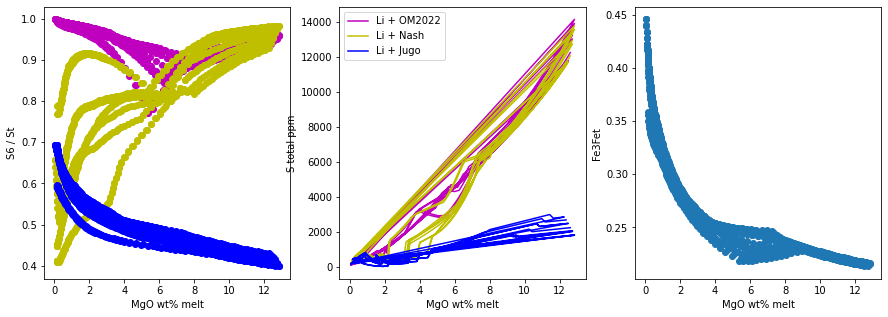

In [55]:
# Comparing S total results and S6+/St from different models

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

x = empty_index['MgO_Liq']
# smythe and oneill
#Stot_1 = df_ST_S2017_OM2022['Total_S']
#S6St_1 = df_ST_S2017_OM2022['S6_St']
#ax1.scatter(x,S6St_1)
#ax2.plot(x,Stot_1,label='S2017 + OM2022')
#smythe and nash
#Stot_2 = S2017_ST_Nash['Total_S']
#S6St_2 = S2017_ST_Nash['S6_St']
#ax1.scatter(x,S6St_2,c='c')
#ax2.plot(x,Stot_2,c='c',label='S2017 + Nash')

#lizhang and oneill
Stot_3 = df_ST_OM2022['Total_S']
S6St_3 = df_ST_OM2022['S6_St']
ax1.scatter(x,S6St_3,c='m')
ax2.plot(x,Stot_3,c='m',label='Li + OM2022')
# lizhang and nash
Stot_4 = LiZha_ST_Nash['Total_S']
S6St_4 = LiZha_ST_Nash['S6_St']
ax1.scatter(x,S6St_4,c='y')
ax2.plot(x,Stot_4,c='y', label='Li + Nash')

#li zhang and Jugo
Stot_5 = jugo_liz['Total_S']
S6St_5 = jugo_liz['S6_St']
ax1.scatter(x,S6St_5,c='b')
ax2.plot(x,Stot_5,c='b', label='Li + Jugo')

ax3.scatter(x,empty_index['Fe3Fet_Liq'])

ax2.set_ylabel('S total ppm')
ax1.set_ylabel('S6 / St')
ax3.set_ylabel('Fe3Fet')
ax1.set_xlabel('MgO wt% melt')
ax2.set_xlabel('MgO wt% melt')
ax3.set_xlabel('MgO wt% melt')
ax2.legend()


In [56]:
empty_index['DeltaQFM'] = calc_fo2['DeltaQFM']
empty_index['S_total_lizOM'] = df_ST_OM2022['Total_S']
empty_index['S_total_lizJUGO'] = jugo_liz['Total_S']
empty_index['S6St_lizOM'] = df_ST_OM2022['S6_St']
empty_index['S6St_lizJUGO'] = jugo_liz['S6_St']
empty_index['S_total_lizNASH'] = LiZha_ST_Nash['Total_S']
empty_index['S6St_lizNASH'] = LiZha_ST_Nash['S6_St']

(0.5, 1.5)

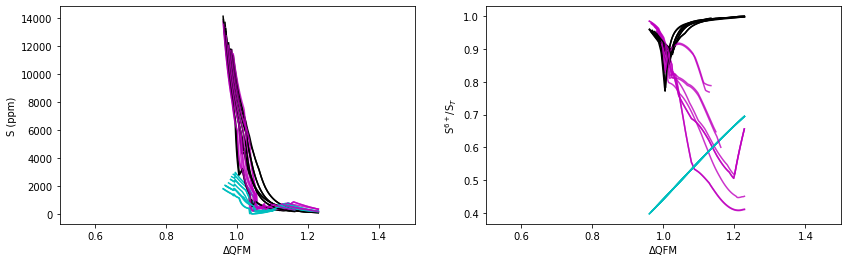

In [58]:
#plt.scatter(df_ST_OM2022['Total_S'],empty_index['Fe3Fet_Liq'],color='k')
#plt.scatter(calc_fo2['DeltaQFM'],df_ST_OM2022['Total_S'],color='k')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
for i in empty_index.unique.unique():
    x = empty_index[empty_index.unique ==i]
    

    ax1.plot(x['DeltaQFM'],x['S_total_lizOM'], c='k',label=i)
    ax1.plot(x['DeltaQFM'],x['S_total_lizJUGO'],c='c', label=i)
    ax1.plot(x['DeltaQFM'],x['S_total_lizNASH'],c='m',alpha=0.8, label=i)
    ax2.plot(x['DeltaQFM'],x['S6St_lizOM'], c='k',label='S$^{6}$/$_{T}$')
    ax2.plot(x['DeltaQFM'],x['S6St_lizJUGO'],c='c', label='S$^{6}$/$_{T}$')
    ax2.plot(x['DeltaQFM'],x['S6St_lizNASH'],c='m',alpha=0.8, label='S$^{6}$/$_{T}$')
    
ax1.set_ylabel('S (ppm)')
ax2.set_ylabel('S$^{6+}$/S$_{T}$')
ax1.set_xlabel('ΔQFM')
ax2.set_xlabel('ΔQFM')
ax2.set_xlim(0.5,1.5)
ax1.set_xlim(0.5,1.5)


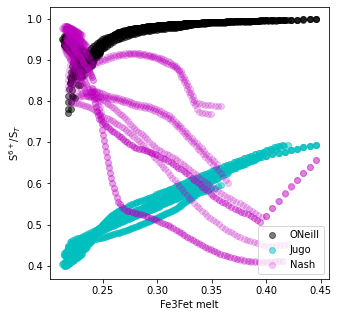

In [62]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,5))

ax1.scatter(empty_index['Fe3Fet_Liq'],empty_index['S6St_lizOM'], c='k',alpha=0.5,label='ONeill')
ax1.scatter(empty_index['Fe3Fet_Liq'],empty_index['S6St_lizJUGO'],c='c',alpha=0.5, label='Jugo')
ax1.scatter(empty_index['Fe3Fet_Liq'],empty_index['S6St_lizNASH'],c='m',alpha=0.2, label='Nash')
ax1.set_ylabel('S$^{6+}$/S$_{T}$')
ax1.set_xlabel('Fe3Fet melt')
ax1.legend()

In [63]:
df_Species = LiZha_ST_Nash.copy()
df_Species['MgO_Liq'] = empty_index['MgO_Liq']

SCSS=LiZhang22['SCSS_Tot']
SCAS=ZT22_SCAS['Calc SCAS (ppm)']

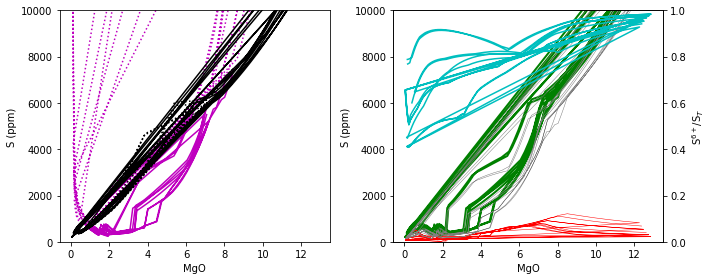

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
SCSS_Tot_excessS6=df_Species['S6 in SCSS_Tot']>df_Species['SCAS_6']

ax1.plot(df_Species['MgO_Liq'].loc[~SCSS_Tot_excessS6],
         df_Species['SCSS_Tot'].loc[~SCSS_Tot_excessS6], '-m', label='SCSS Tot')

ax1.plot(df_Species['MgO_Liq'].loc[SCSS_Tot_excessS6],
         df_Species['SCSS_Tot'].loc[SCSS_Tot_excessS6], ':m')

SCAS_Tot_excessS2=df_Species['S2 in SCAS_Tot']>df_Species['SCSS_2']

ax1.plot(df_Species['MgO_Liq'].loc[~SCAS_Tot_excessS2],
         df_Species['SCAS_Tot'].loc[~SCAS_Tot_excessS2], '-k', label='SCAS_Tot')
ax1.plot(df_Species['MgO_Liq'].loc[SCAS_Tot_excessS2],
         df_Species['SCAS_Tot'].loc[SCAS_Tot_excessS2], ':k')

#ax1.plot([-1, 3], [SCSS, SCSS], '-m', lw=0.5, label='S2- sol limit')
#ax1.plot([-1, 3], [SCAS, SCAS], '-k', lw=0.5, label='S6 sol limit')
#ax1.plot([-1, 3], [SCAS+SCSS, SCAS+SCSS], '-g', lw=0.5, label='ST sol limit')

maxS=SCSS+SCAS
maxX=df_Species['MgO_Liq'].loc[df_Species['Total_S']==maxS]
ax2.plot(df_Species['MgO_Liq'], df_Species['Total_S'], '-g', lw=2, label='Total S')

ax2.yaxis.set_tick_params(which='both', labelbottom=True)
ax2b=ax2.twinx()
ax2.plot(df_Species['MgO_Liq'], df_Species['S2_Tot'], '-r', lw=0.5, label='S$^{2}$')
ax2.plot(df_Species['MgO_Liq'], df_Species['S6_Tot'], '-', color='grey', lw=0.5, label='S$^{6}$')

ax2b.plot(df_Species['MgO_Liq'], df_Species['S6_St'], '-c', label='S$^{6}$/$_{T}$')

ax2b.plot([maxX, maxX], [0, 1], ':c')
ax1.set_ylim([0, 10000])
ax2.set_ylim([0, 10000])
ax2b.set_ylim([0, 1])
ax1.set_ylabel('S (ppm)')
ax2.set_ylabel('S (ppm)')
ax1.set_xlabel('MgO')
ax2.set_xlabel('MgO')
ax2b.set_ylabel('S$^{6+}$/S$_{T}$')
fig.tight_layout()

In [68]:
empty_index[empty_index.newcolumn.isin(['H2O_4.0_buff_QFM_1'])].to_excel('NDB_model_QFM1_h2o4.xlsx')